In [22]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [23]:
# ｄｆとして保存済みの前処理済みデータを読み込む
df = pd.read_pickle('dirt_maesyori0218.pkl')

In [24]:
df.shape

(537533, 26)

In [25]:
df.head(2)

,場所,馬名,距離,走破タイム,レース番号,クラスコード,馬場状態,性別,騎手名,斤量,...,生産者名,父馬名,母馬名,母の父馬名,毛色,レースID,仮予測,生後日数,一意なレースID,レースごとの平均賞金
0,札幌,サンダビューク,1000,59.3,7,23,不,牡,石川倭,58.0,...,村下清志,ザファクター,エミリア,サンデーサイレンス,黒鹿,123160706,60.020266,1580,1231607,126.666667
1,札幌,フクノワカバ,1000,59.3,7,23,不,牝,鮫島克駿,54.0,...,信岡牧場,ドレフォン,マレーナ,ダイワメジャー,黒鹿,123160705,60.690153,1241,1231607,126.666667


In [26]:
#用済み列を削除
df=df.drop({'一意なレースID'},axis=1)
df.head(3)

,場所,馬名,距離,走破タイム,レース番号,クラスコード,馬場状態,性別,騎手名,斤量,...,現馬主名,生産者名,父馬名,母馬名,母の父馬名,毛色,レースID,仮予測,生後日数,レースごとの平均賞金
0,札幌,サンダビューク,1000,59.3,7,23,不,牡,石川倭,58.0,...,加藤信之,村下清志,ザファクター,エミリア,サンデーサイレンス,黒鹿,123160706,60.020266,1580,126.666667
1,札幌,フクノワカバ,1000,59.3,7,23,不,牝,鮫島克駿,54.0,...,佐藤範夫,信岡牧場,ドレフォン,マレーナ,ダイワメジャー,黒鹿,123160705,60.690153,1241,126.666667
2,札幌,クロンヌドラレーヌ,1000,59.3,7,23,不,牝,佐々木大,54.0,...,ライオンレースホース,社台ファーム,ロードカナロア,クラウンプリンセス,スペシャルウィーク,鹿毛,123160712,62.369290,1549,126.666667


# 輸送経路を表す列を作成

「関西→東京の馬は遅い傾向がある」等のストレス値を数値化したい。

In [27]:
# 特定の列と特定の列の文字列を組み合わせて新しい列を作成する関数
def combine_columns(row):
    return row['所属地'] +'→'+ row['場所']

# apply() メソッドを使用して新しい列を作成する
df['移動距離'] = df.apply(combine_columns, axis=1)
df.head(1)

,場所,馬名,距離,走破タイム,レース番号,クラスコード,馬場状態,性別,騎手名,斤量,...,生産者名,父馬名,母馬名,母の父馬名,毛色,レースID,仮予測,生後日数,レースごとの平均賞金,移動距離
0,札幌,サンダビューク,1000,59.3,7,23,不,牡,石川倭,58.0,...,村下清志,ザファクター,エミリア,サンデーサイレンス,黒鹿,123160706,60.020266,1580,126.666667,美→札幌


In [28]:
#NAないか調べる
df.isnull().sum(axis=0)

場所            0
馬名            0
距離            0
走破タイム         0
レース番号         0
クラスコード        0
馬場状態          0
性別            0
騎手名           0
斤量            0
馬番            0
馬体重           0
上がり3Fタイム      0
調教師           0
所属地           0
現馬主名          0
生産者名          0
父馬名           0
母馬名           0
母の父馬名         0
毛色            0
レースID         0
仮予測           0
生後日数          0
レースごとの平均賞金    0
移動距離          0
dtype: int64

<Axes: xlabel='仮予測', ylabel='走破タイム'>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20206 (\N{CJK UNIFIED IDEOGRAPH-4EEE}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKA

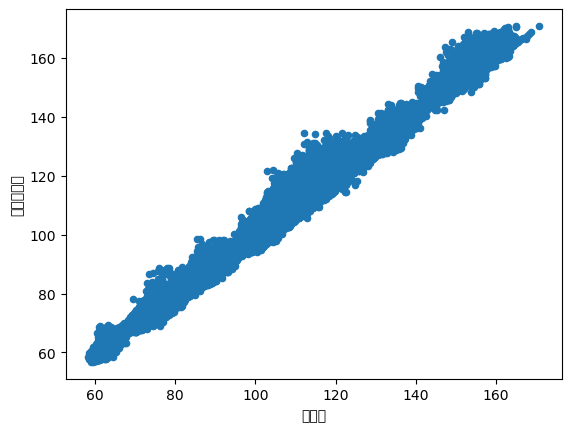

In [17]:
#仮予測の列と実際のタイムの列を比較
df.plot(kind='scatter',x='仮予測',y='走破タイム')

# 各種ダミー変数化

In [29]:
#馬場状態をダミー変数化
BABAcon=pd.get_dummies(df['馬場状態'],drop_first=True)
BABAcon[22:26]

,稍,良,重
22,False,False,False
23,False,False,False
24,False,True,False
25,False,True,False


In [31]:
BABAcon = BABAcon.astype(int)
BABAcon[22:26]

,稍,良,重
22,0,0,0
23,0,0,0
24,0,1,0
25,0,1,0


In [32]:
#馬場状態をダミー変数化した列を追加
df_BABAcon=pd.concat([df,BABAcon],axis=1)
df_BABAcon[22:26]

,場所,馬名,距離,走破タイム,レース番号,クラスコード,馬場状態,性別,騎手名,斤量,...,母の父馬名,毛色,レースID,仮予測,生後日数,レースごとの平均賞金,移動距離,稍,良,重
22,札幌,スクリプタム,1000,60.8,2,7,不,牝,山田敬士,54.0,...,クロフネ,青鹿,123150210,61.766855,1153,87.333333,美→札幌,0,0,0
23,札幌,ドゥミプリエ,1000,60.9,2,7,不,牝,松本大輝,53.0,...,Galileo,栗毛,123150211,62.467416,1276,87.333333,栗→札幌,0,0,0
24,札幌,ウェイオブサクセス,1000,59.3,2,7,良,牝,鷲頭虎太,51.0,...,Pyro,栗毛,123140206,60.936182,1176,87.333333,栗→札幌,0,1,0
25,札幌,ロードサミット,1000,59.9,2,7,良,牡,鮫島克駿,56.0,...,ディープインパクト,鹿毛,123140202,61.184386,1230,87.333333,栗→札幌,0,1,0


In [33]:
#馬場状態のもとの列を削除
df_BABAcon=df_BABAcon.drop('馬場状態',axis=1)

In [34]:
df_BABAcon[23:25]

,場所,馬名,距離,走破タイム,レース番号,クラスコード,性別,騎手名,斤量,馬番,...,母の父馬名,毛色,レースID,仮予測,生後日数,レースごとの平均賞金,移動距離,稍,良,重
23,札幌,ドゥミプリエ,1000,60.9,2,7,牝,松本大輝,53.0,11,...,Galileo,栗毛,123150211,62.467416,1276,87.333333,栗→札幌,0,0,0
24,札幌,ウェイオブサクセス,1000,59.3,2,7,牝,鷲頭虎太,51.0,6,...,Pyro,栗毛,123140206,60.936182,1176,87.333333,栗→札幌,0,1,0


In [35]:
df_BABAcon.shape

(537533, 28)

In [36]:
#どのようなコラムがあるか表示
print(df_BABAcon.columns.to_list())

['場所', '馬名', '距離', '走破タイム', 'レース番号', 'クラスコード', '性別', '騎手名', '斤量', '馬番', '馬体重', '上がり3Fタイム', '調教師', '所属地', '現馬主名', '生産者名', '父馬名', '母馬名', '母の父馬名', '毛色', 'レースID', '仮予測', '生後日数', 'レースごとの平均賞金', '移動距離', '稍', '良', '重']


In [37]:
#性別をダミー変数化
sex=pd.get_dummies(df_BABAcon['性別'],drop_first=True)
#性別をダミー変数化した列を追加
df_sex=pd.concat([df_BABAcon,sex],axis=1)
df_sex=df_sex.drop('性別',axis=1)
df_sex.shape

(537533, 29)

In [ ]:
sex = BABAcon.astype(int)
BABAcon[22:26]

In [38]:
df_sex.head(1)

,場所,馬名,距離,走破タイム,レース番号,クラスコード,騎手名,斤量,馬番,馬体重,...,レースID,仮予測,生後日数,レースごとの平均賞金,移動距離,稍,良,重,牝,牡
0,札幌,サンダビューク,1000,59.3,7,23,石川倭,58.0,6,454,...,123160706,60.020266,1580,126.666667,美→札幌,0,0,0,False,True


In [17]:
#クラスコード（G1などレベルが高くなると数値上がっている）をダミー変数化

# 特定の列の型を確認する
print(df_sex.dtypes['クラスコード'])

int64


In [18]:
#クラスコードが何種類かを表示
print(df_sex.nunique())

場所                10
馬名             87222
距離                14
走破タイム           1129
レース番号             12
クラスコード            13
騎手名              699
斤量                22
馬番                16
馬体重              150
上がり3Fタイム         211
調教師              732
所属地                4
現馬主名            3847
生産者名            4060
父馬名             1970
母馬名            29676
母の父馬名           2593
毛色                 8
レースID         537533
仮予測           191731
生後日数            2873
レースごとの平均賞金       666
移動距離              34
稍                  2
良                  2
重                  2
牝                  2
牡                  2
dtype: int64


In [19]:
#クラスコードは13種類なので、✙12-1=11列増えるはず

In [20]:
#クラスコードをダミー変数化
classes=pd.get_dummies(df_sex['クラスコード'],drop_first=True)
#クラスコードをダミー変数化した列を追加
df_classes=pd.concat([df_sex,classes],axis=1)
df_classes=df_classes.drop('クラスコード',axis=1)
df_classes.shape

(537533, 40)

In [21]:
#29+11=40列になっている、OK

In [22]:
#毛色をダミー変数化
haircolor=pd.get_dummies(df_classes['毛色'],drop_first=True)
#毛色をダミー変数化した列を追加
df_haircolor=pd.concat([df_classes,haircolor],axis=1)
df_haircolor=df_haircolor.drop('毛色',axis=1)
df_haircolor.shape

(537533, 46)

In [23]:
#毛色は８種類、+7-1で、６列増えてる、OK

In [24]:
#移動距離をダミー変数化
idoukyori=pd.get_dummies(df_haircolor['移動距離'],drop_first=True)
#移動距離をダミー変数化した列を追加
df_idoukyori=pd.concat([df_haircolor,idoukyori],axis=1)
df_idoukyori=df_idoukyori.drop('移動距離',axis=1)
df_idoukyori.shape

(537533, 78)

In [25]:
#移動距離は３４種類、46+32＝78、OK

In [26]:
df_idoukyori.head(2)

,場所,馬名,距離,走破タイム,レース番号,騎手名,斤量,馬番,馬体重,上がり3Fタイム,...,美→中京,美→中山,美→京都,美→函館,美→小倉,美→新潟,美→札幌,美→東京,美→福島,美→阪神
0,札幌,サンダビューク,1000,59.3,7,石川倭,58.0,6,454,35.9,...,False,False,False,False,False,False,True,False,False,False
1,札幌,フクノワカバ,1000,59.3,7,鮫島克駿,54.0,5,446,36.1,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#どのようなコラムがあるか表示
print(df_idoukyori.columns.to_list())

['場所', '馬名', '距離', '走破タイム', 'レース番号', '騎手名', '斤量', '馬番', '馬体重', '上がり3Fタイム', '調教師', '所属地', '現馬主名', '生産者名', '父馬名', '母馬名', '母の父馬名', 'レースID', '仮予測', '生後日数', 'レースごとの平均賞金', '稍', '良', '重', '牝', '牡', 11, 15, 23, 39, 43, 67, 115, 131, 147, 163, 179, 195, '栗毛', '白毛', '芦毛', '青毛', '青鹿', '鹿毛', '黒鹿', '地→中山', '地→京都', '地→函館', '地→小倉', '地→新潟', '地→札幌', '地→東京', '地→福島', '地→阪神', '外→中京', '外→中山', '外→東京', '外→阪神', '栗→中京', '栗→中山', '栗→京都', '栗→函館', '栗→小倉', '栗→新潟', '栗→札幌', '栗→東京', '栗→福島', '栗→阪神', '美→中京', '美→中山', '美→京都', '美→函館', '美→小倉', '美→新潟', '美→札幌', '美→東京', '美→福島', '美→阪神']


In [28]:
# データフレームをpickleファイルとして保存
df_idoukyori.to_pickle('ダミー処理①0218.pkl')

# データの要約（２回目）（前処理後どうなっているか）

In [29]:
#1600mだけの傾向を参考までに
dirt1600=df_idoukyori[df_idoukyori['距離']==1600]
dirt1600.shape

(32984, 78)

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26020 (\N{CJK UNIFIED IDEOGRAPH-65A4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

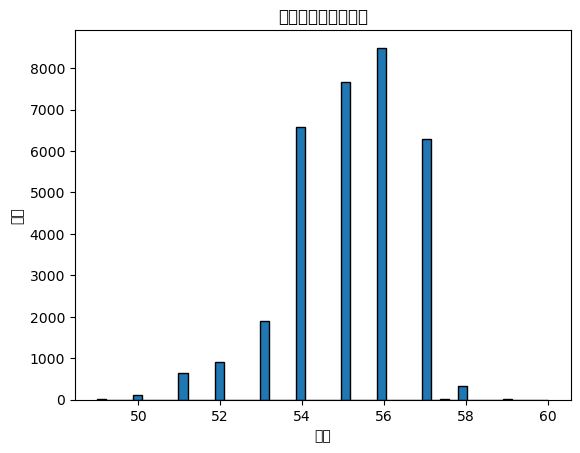

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

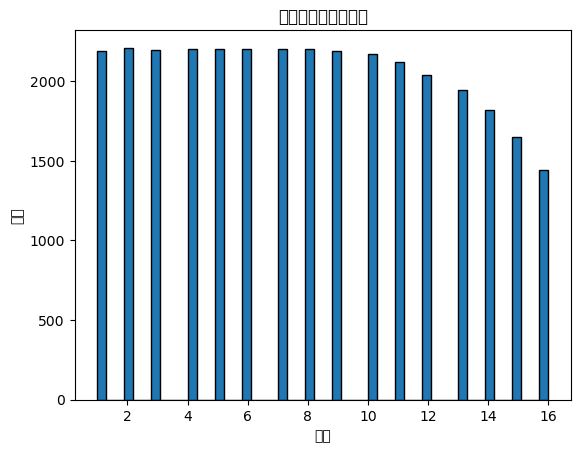

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

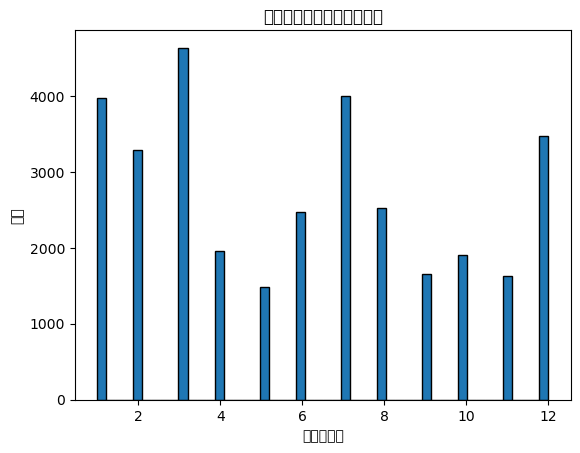

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_

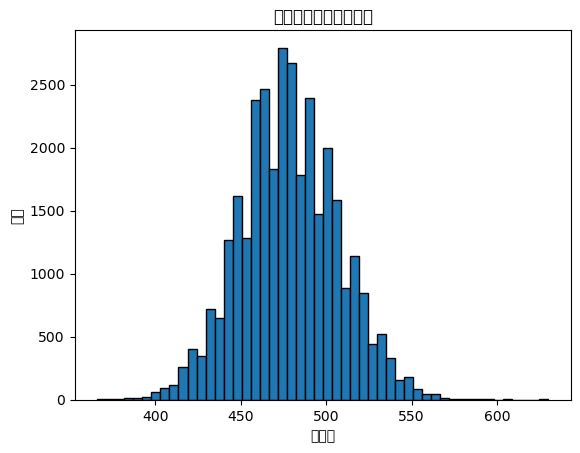

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Use

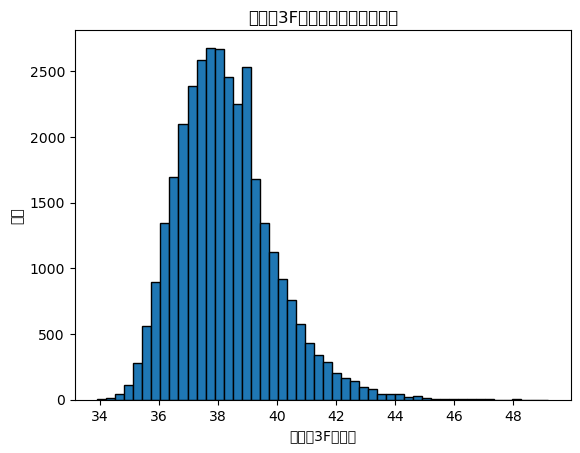

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_

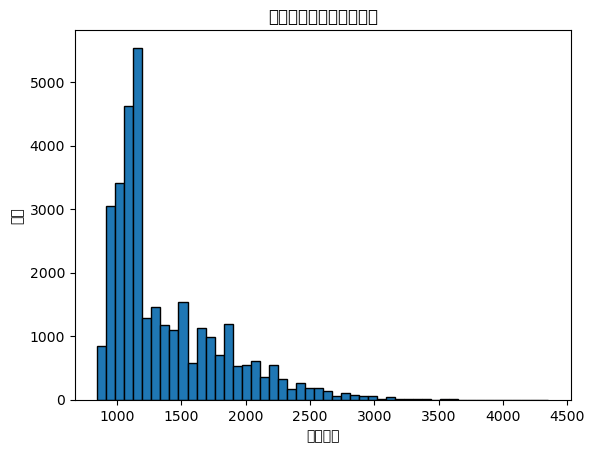

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20206 (\N{CJK UNIFIED IDEOGRAPH-4EEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_

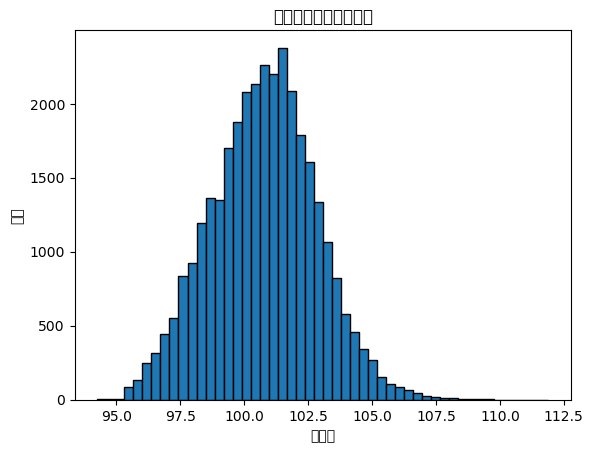

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

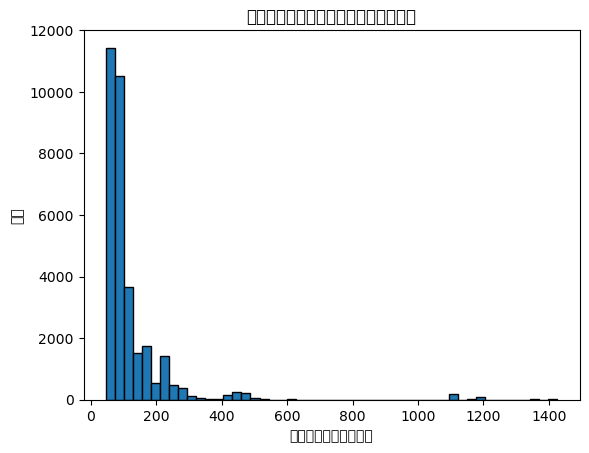

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

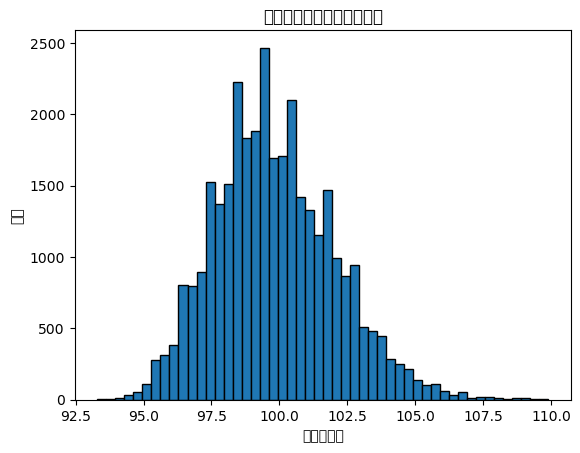

In [30]:
import matplotlib.pyplot as plt
# カラム名のリスト
columns_to_plot = ['斤量' , '馬番','レース番号','馬体重','上がり3Fタイム','生後日数', '仮予測','レースごとの平均賞金','走破タイム']

# ループで各列のヒストグラムを表示
for column in columns_to_plot:
    plt.figure()  # 新しいプロットを作成
    dirt1600[column].plot(kind='hist', bins=50, edgecolor='black')  # ヒストグラムをプロット
    plt.title(f'{column}のヒストグラム')  # グラフのタイトル
    plt.xlabel(column)  # x軸ラベル
    plt.ylabel('頻度')  # y軸ラベル
    plt.show()  # グラフを表示

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26020 (\N{CJK UNIFIED IDEOGRAPH-65A4}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTE

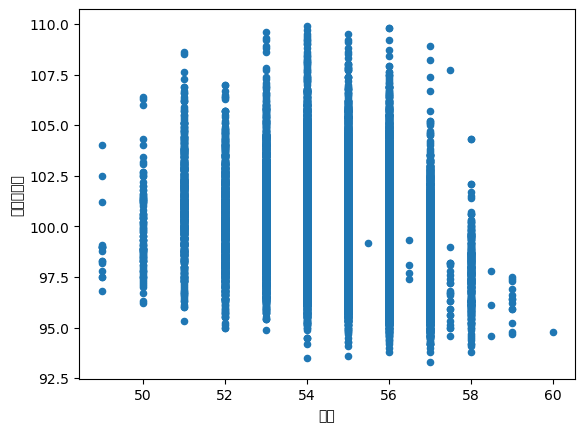

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


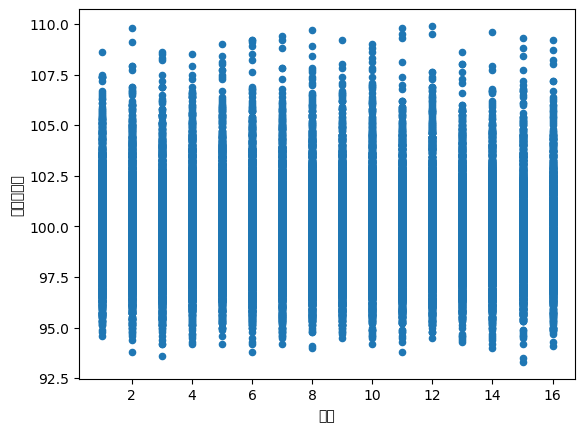

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


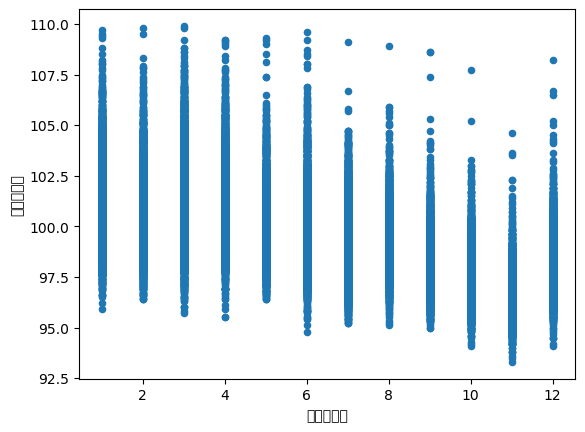

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


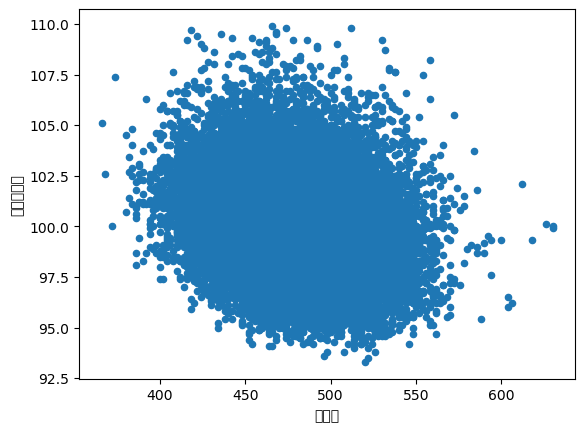

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


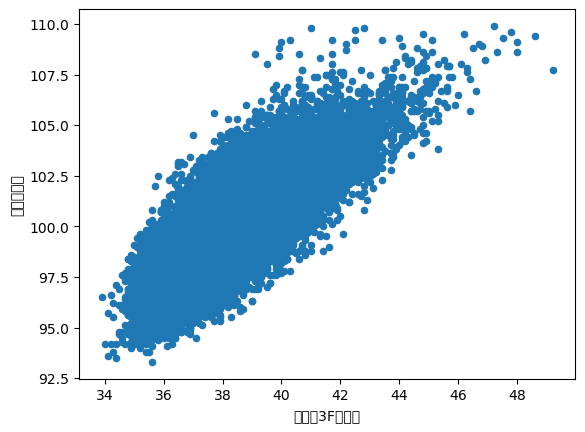

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


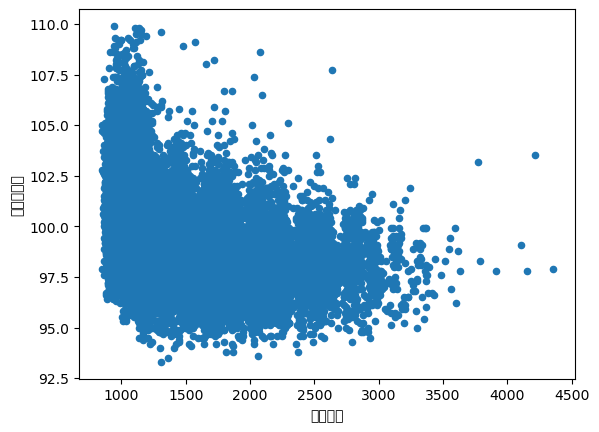

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20206 (\N{CJK UNIFIED IDEOGRAPH-4EEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


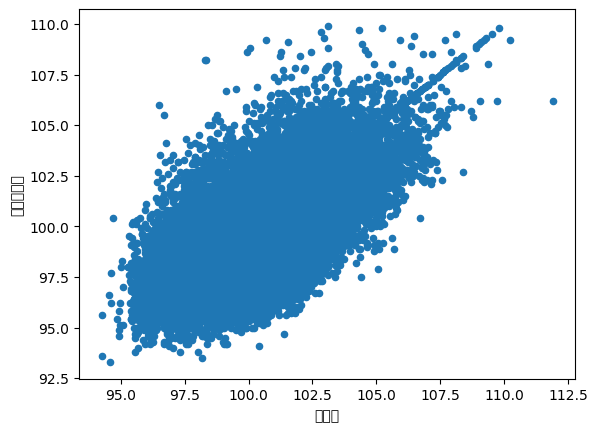

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc

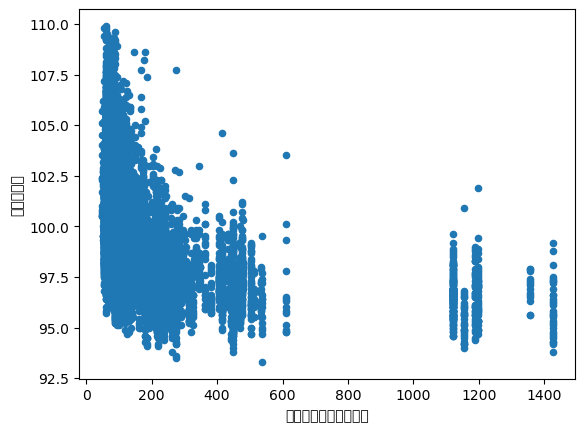

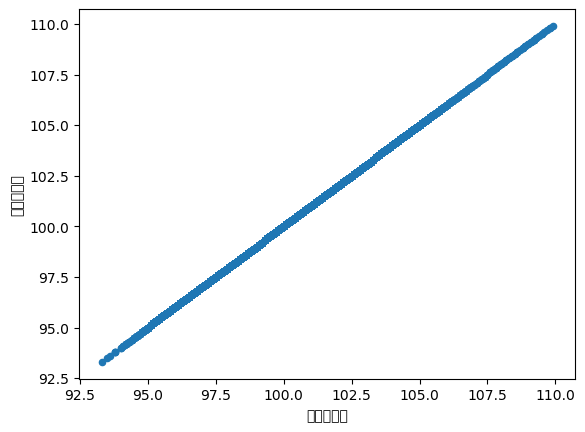

In [31]:
#相関図行列

# カラム名のリスト（先ほど宣言済み）

#速度と他の変数の相関行列
for name in columns_to_plot:
    dirt1600.plot(kind='scatter',x=name,y='走破タイム')

In [32]:
#相関行列を見るためだけのデータフレームを作成
soukan=dirt1600[columns_to_plot]
soukan.head

<bound method NDFrame.head of           斤量  馬番  レース番号  馬体重  上がり3Fタイム  生後日数         仮予測  レースごとの平均賞金  走破タイム
258006  56.0  16     10  508      36.9  1917   98.065476      219.00   95.3
258007  56.0   9     10  504      36.2  1949   97.027601      219.00   95.6
258008  57.0  10     10  478      36.5  1511   96.483982      219.00   95.7
258009  56.0  15     10  518      37.7  1538   97.370439      219.00   95.7
258010  53.0  12     10  494      36.8  1898   95.700000      219.00   95.7
...      ...  ..    ...  ...       ...   ...         ...         ...    ...
290985  53.0   4      3  452      41.1  1054  104.241343       71.25  103.3
290986  53.0  11      3  428      43.1  1058  106.016233       71.25  104.4
290987  53.0  13      3  484      42.5   973  104.500000       71.25  104.5
290988  53.0   2      3  406      44.1  1053  105.000000       71.25  105.0
290989  53.0   6      3  456      44.9   998  102.046299       71.25  106.8

[32984 rows x 9 columns]>

In [33]:
#相関行列を見る
soukan=soukan.corr()
soukan

,斤量,馬番,レース番号,馬体重,上がり3Fタイム,生後日数,仮予測,レースごとの平均賞金,走破タイム
斤量,1.000000,0.011830,0.369072,0.340042,-0.247477,0.355268,-0.239502,0.231129,-0.305088
馬番,0.011830,1.000000,0.010964,-0.002189,0.002458,0.016787,-0.010883,-0.005680,-0.025715
レース番号,0.369072,0.010964,1.000000,0.236832,-0.423586,0.669547,-0.510621,0.477648,-0.590630
馬体重,0.340042,-0.002189,0.236832,1.000000,-0.163055,0.197574,-0.160062,0.170403,-0.232986
上がり3Fタイム,-0.247477,0.002458,-0.423586,-0.163055,1.000000,-0.336193,0.464037,-0.270830,0.785422
生後日数,0.355268,0.016787,0.669547,0.197574,-0.336193,1.000000,-0.385489,0.397365,-0.474839
仮予測,-0.239502,-0.010883,-0.510621,-0.160062,0.464037,-0.385489,1.000000,-0.402250,0.640599
レースごとの平均賞金,0.231129,-0.005680,0.477648,0.170403,-0.270830,0.397365,-0.402250,1.000000,-0.408145
走破タイム,-0.305088,-0.025715,-0.590630,-0.232986,0.785422,-0.474839,0.640599,-0.408145,1.000000


In [34]:
soukan=soukan.corr()['走破タイム']
soukan

斤量           -0.789520
馬番           -0.071417
レース番号        -0.959069
馬体重          -0.641971
上がり3Fタイム      0.973918
生後日数         -0.921747
仮予測           0.932369
レースごとの平均賞金   -0.861038
走破タイム         1.000000
Name: 走破タイム, dtype: float64

In [35]:
#走破タイムとの相関係数を絶対値準にソート
# 絶対値でシリーズをソートする
sorted_series = soukan.abs().sort_values(ascending=False)

# ソート結果を元のデータと対応させる
sorted_data = soukan.loc[sorted_series.index]

# 結果を表示
print(sorted_data)

走破タイム         1.000000
上がり3Fタイム      0.973918
レース番号        -0.959069
仮予測           0.932369
生後日数         -0.921747
レースごとの平均賞金   -0.861038
斤量           -0.789520
馬体重          -0.641971
馬番           -0.071417
Name: 走破タイム, dtype: float64
